In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import OrderedDict
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error




In [2]:
df1 = pd.read_csv('Medibuddy Insurance Data Price.csv')
df2 = pd.read_excel('Medibuddy insurance data personal details.xlsx')

In [3]:
df2.head(10)

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest
5,PLC157231,0,no,southwest
6,PLC157303,0,no,southwest
7,PLC157483,0,no,southwest
8,PLC157492,2,no,southwest
9,PLC157546,3,no,southwest


In [4]:
df1.head(10)

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520
5,PLC156943,31,female,25.740,3756.62160
6,PLC156952,46,female,33.440,8240.58960
7,PLC156961,37,female,27.740,7281.50560
8,PLC156970,37,male,29.830,6406.41070
9,PLC156979,60,female,25.840,28923.13692


In [5]:
df_merge = pd.merge(df1, df2, on = 'Policy no.')

In [6]:
df = df_merge.drop('Policy no.', axis =1)
df

,age,sex,bmi,charges in INR,children,smoker,region
0,19,female,27.900,16884.92400,0,yes,southwest
1,18,male,33.770,1725.55230,1,no,southeast
2,28,male,33.000,4449.46200,3,no,southeast
3,33,male,22.705,21984.47061,0,no,northwest
4,32,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...
1333,50,male,30.970,10600.54830,3,no,northwest
1334,18,female,31.920,2205.98080,0,no,northeast
1335,18,female,36.850,1629.83350,0,no,southeast
1336,21,female,25.800,2007.94500,0,no,southwest


In [7]:
le= LabelEncoder()

In [8]:
for i in df.columns:
    if df[i].dtypes == 'O':
        df[i]=le.fit_transform(df[i])

In [12]:
df.isnull().value_counts()

index  age    sex    bmi    charges in INR  children  smoker  region
False  False  False  False  False           False     False   False     1337
dtype: int64

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.reset_index(inplace = True)

In [18]:
df.drop('index', axis=1, inplace=True)

In [19]:
def custom_summary(df):
    
    result = []
    resulto = []
    
    
    for i in df.columns:
        
#        if df[i].dtypes == 'O':
#            statisticso = OrderedDict({
#                'Feature name' : i,
#                'Count' : df[i].count(),
#                'Mode' : df[i].mode().to_string,
#                'Each count' : round(df[i].value_counts(normalize = True),2).to_string().replace('\n', ' ')
#            })
#            resulto.append(statisticso)

            
 #       else:
        statistics = OrderedDict({
            'Feature name' : i,
            'Count' : df[i].count(),
            'Min' : round(df[i].min(), 2),
            '1st Quartile' : round(df[i].quantile(0.25), 2),
            'Mean' : round(df[i].mean(), 2),
            'Median' : round(df[i].median(), 2),
            '3rd Quartile' : round(df[i].quantile(0.75), 2),
            'Max' : round(df[i].max(), 2),
            'Var' : round(df[i].var(), 2),
            'Stdev' : round(df[i].std(), 2),
            'IQR' : round(df[i].quantile(0.75) - df[i].quantile(0.25), 2)

        })

        #checking for kurtosis
        kt = df[i].kurt()
        if kt>=1:
            label = 'Leptokurtic'
        elif kt<=-1:
            label = 'Mesokurtic'
        else:
            label = 'Platykurtic'
        statistics['Kurtosis Comment'] = label

        #checking for skewness
        sk = df[i].skew()
        if sk<=-1:
            sk_t = 'Highly -ve skewed'
        elif sk>-1 and sk<-0.5:
            sk_t = 'Moderately -ve skewed'
        elif sk>0.5 and sk<1:
            sk_t = 'Moderately +ve skewed'        
        elif sk>=1:
            sk_t = 'Highly +ve skewed'
        elif sk<=0.5 and sk>=-0.5:
            sk_t = 'Approx Symmetric'
        statistics['Skewness Comment'] = sk_t
        
#        if df_merge[i].dtypes == 'O':
#            statistics['Mode'] = df[i].mode()[0]
            
        result.append(statistics)

    result_df = pd.DataFrame(data = result)
#    result_dfo = pd.DataFrame(data = resulto)
    return(result_df) 
    
    
    
    

In [20]:
custom_summary(df)

,Feature name,Count,Min,1st Quartile,Mean,Median,3rd Quartile,Max,Var,Stdev,IQR,Kurtosis Comment,Skewness Comment
0,age,1337,18.00,27.00,39.22,39.00,51.00,64.00,1.972400e+02,14.04,24.00,Mesokurtic,Approx Symmetric
1,sex,1337,0.00,0.00,0.50,1.00,1.00,1.00,2.500000e-01,0.50,1.00,Mesokurtic,Approx Symmetric
2,bmi,1337,15.96,26.29,30.66,30.40,34.70,53.13,3.722000e+01,6.10,8.41,Platykurtic,Approx Symmetric
3,charges in INR,1337,1121.87,4746.34,13279.12,9386.16,16657.72,63770.43,1.466608e+08,12110.36,11911.37,Leptokurtic,Highly +ve skewed
4,children,1337,0.00,0.00,1.10,1.00,2.00,5.00,1.450000e+00,1.21,2.00,Platykurtic,Moderately +ve skewed
5,smoker,1337,0.00,0.00,0.20,0.00,0.00,1.00,1.600000e-01,0.40,0.00,Platykurtic,Highly +ve skewed
6,region,1337,0.00,1.00,1.52,2.00,2.00,3.00,1.220000e+00,1.11,1.00,Mesokurtic,Approx Symmetric


In [21]:
def odtplots(df, col):
    
    f, (ax1, ax2, ax3) = plt.subplots( 1, 3, figsize = (20, 5) )
    
    
    sns.boxplot(df[col], ax = ax1, color = 'red')
    ax1.set_title('Box plot for '+ col)
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Box plot distribution')
    
    #plotting the histrogram with outliers
    sns.distplot(df[col], ax = ax2, color = 'blue')    
    ax2.set_title('Histogram with outliers '+ col)
    ax2.set_xlabel('Values')
    ax2.set_ylabel('Distribution')    
    
    
    #plotting the histrogram wit outliers
#    y = outlier_treat(df, col) 
#    sns.distplot(y [col], ax = ax3, color = 'green')    
#    ax3.set_title('Histogram without outliers '+ col)
#    ax3.set_xlabel('Values')
#    ax3.set_ylabel('Distribution')    
    
    plt.show()

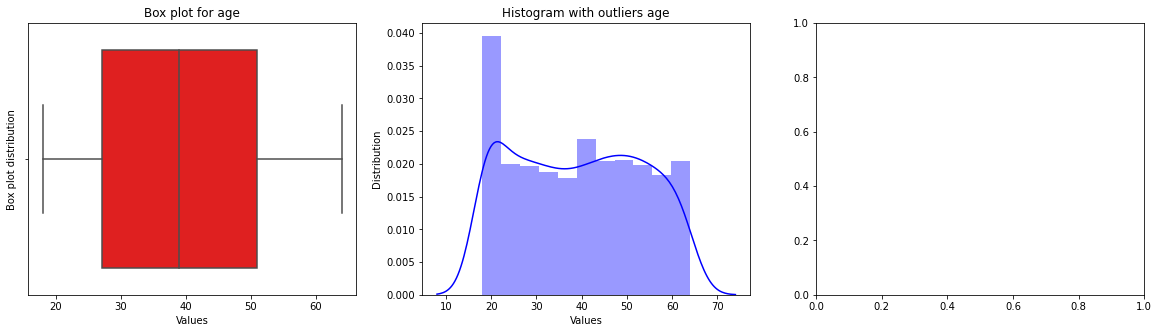

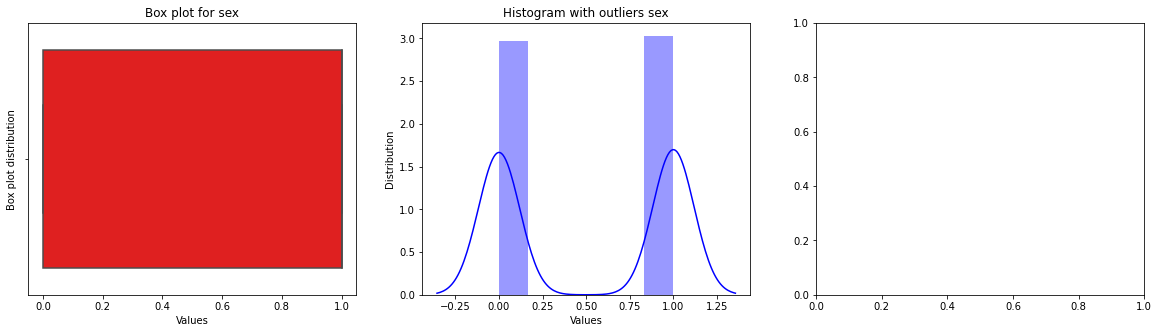

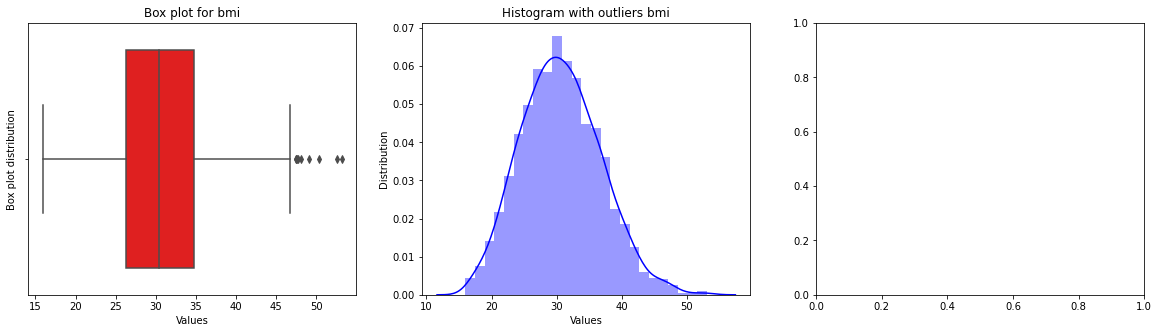

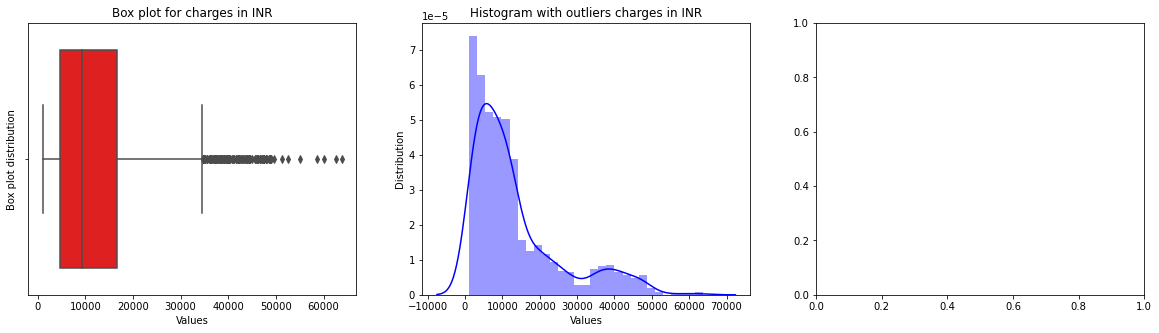

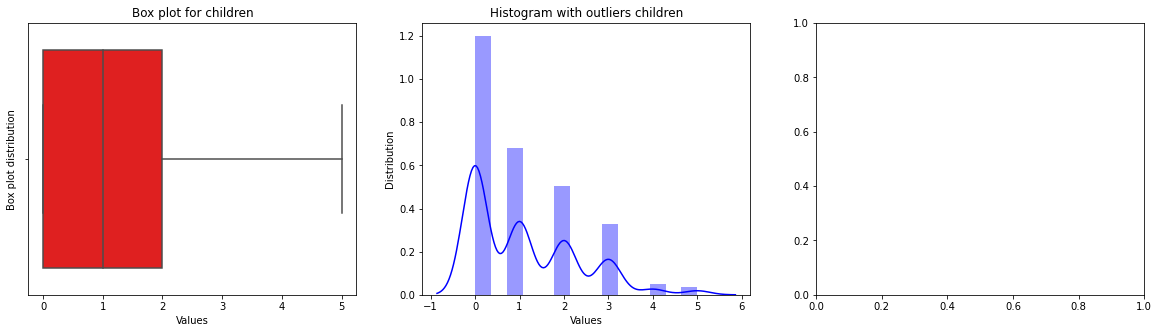

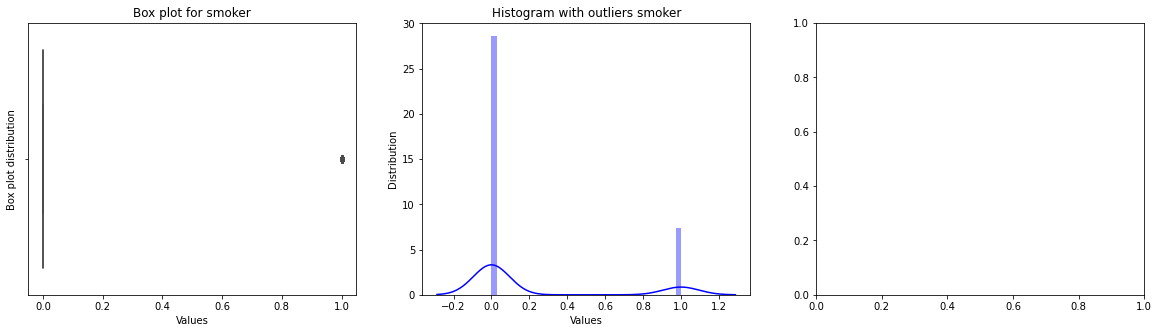

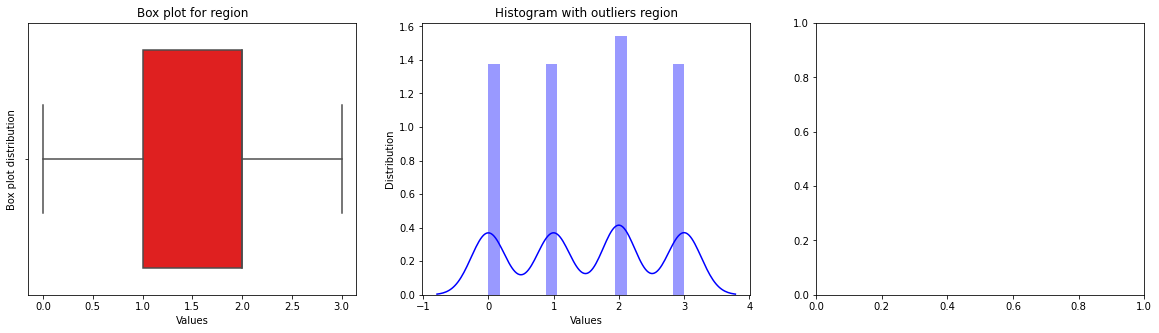

In [22]:
for i in df.columns:
    odtplots(df, i)

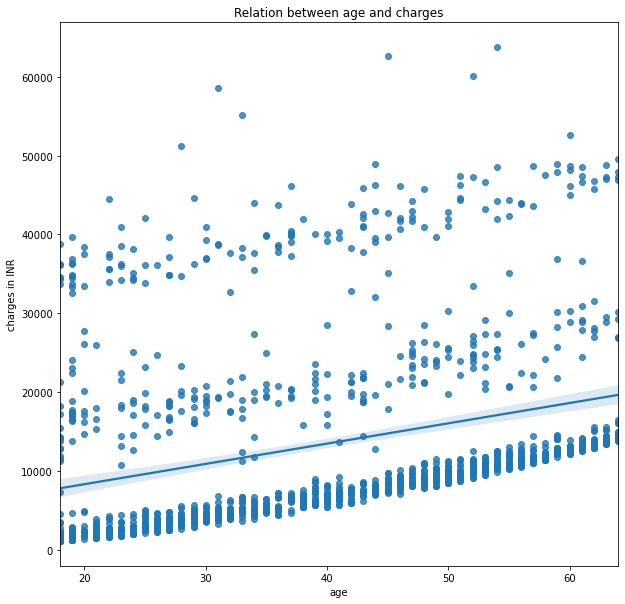

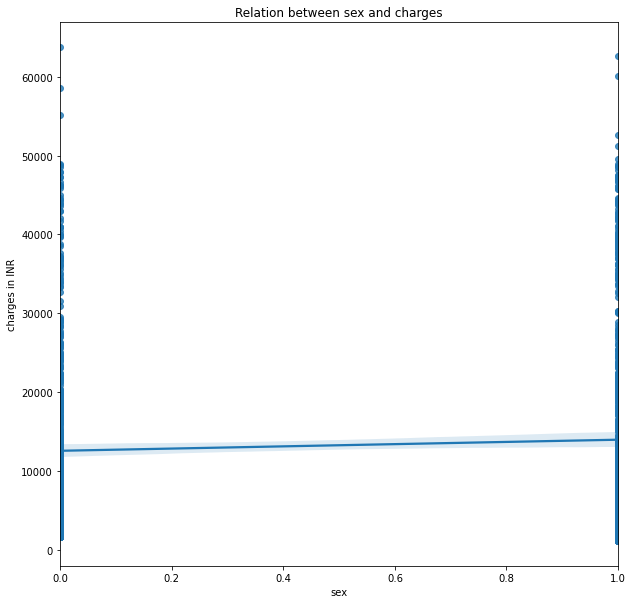

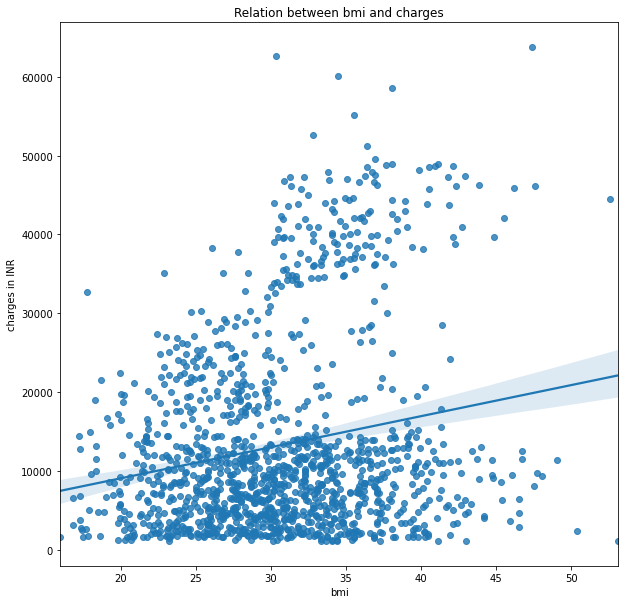

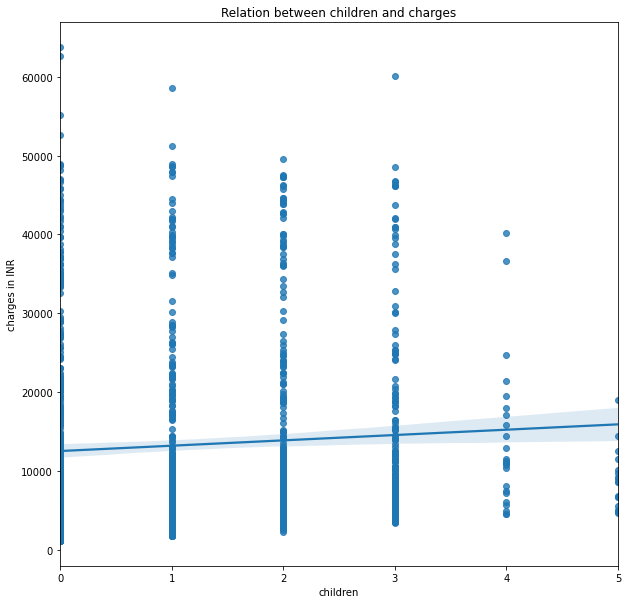

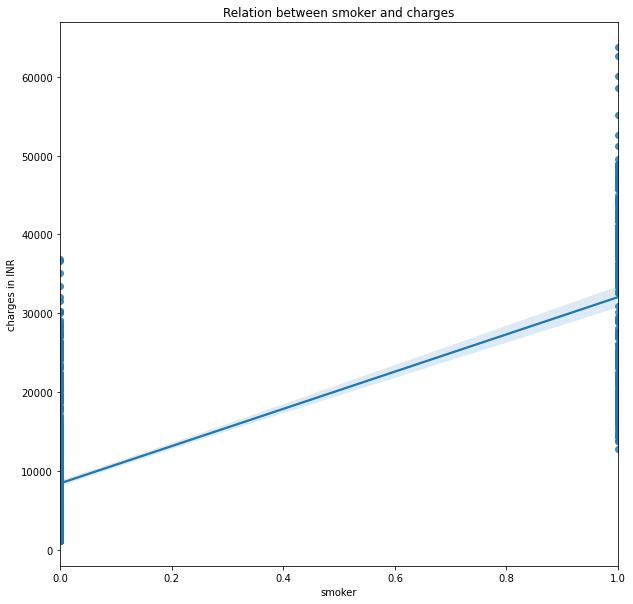

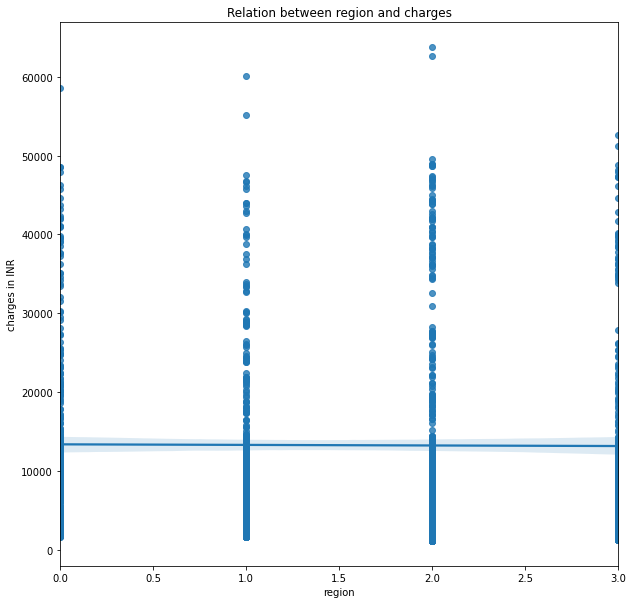

In [23]:
for col in df.columns:
    if col != 'charges in INR':
        f, ax = plt.subplots(figsize = (10,10))
        sns.regplot(x = df[col], y = df['charges in INR']).set_title(f'Relation between {col} and charges')

<AxesSubplot:>

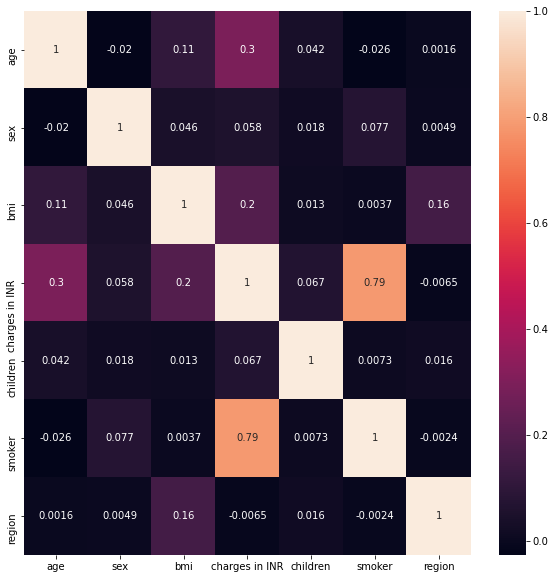

In [24]:
corr = df.corr()

fig = plt.subplots(figsize =(10,10))
sns.heatmap(corr,annot=True)

In [25]:
def vif(df,target):
    indep_var = df.drop(target,axis =1 )
    vif_df = pd.DataFrame()
    vif_df['vif_factor'] = [variance_inflation_factor(indep_var.values,i) for i in range(indep_var.shape[1])]
    vif_df['names'] = indep_var.columns
    
    return vif_df.sort_values('vif_factor',ascending=False)

In [26]:
vif(df,'charges in INR')

,vif_factor,names
2,10.378567,bmi
0,7.558005,age
5,2.924245,region
1,2.000028,sex
3,1.802019,children
4,1.257118,smoker


In [27]:
def apply_pca(x): #apply PCA on independent variables only  
    
    col = []
    n_component = len(x.columns) #PC must not be more than the number of IND features
    
    #first step in PCA is to do standards scalar of IND variables
    x1 = StandardScaler().fit_transform(x)
    
    #applying PCA in a loop
    
    for i in range(1,n_component):
        pca = PCA(n_components= i) #defining n component using for loop
        p_comp = pca.fit_transform(x) # transforming
        evr = np.cumsum(pca.explained_variance_ratio_) # making cumulative sum to find out total data capture
        #evr contains the % data covered after taking each variable 0.8,0.85,0.852 etc)
        if evr[i-1] > 0.9:  #checking the data is more than 90%
            n_component = i #consideing the i value to be n component based on ever
            break
        
    print('The explained variance ratio is', evr)
        
        
    #creating data frame with PCA transform data
        
    for j in range(1, n_component + 1):
        col.append('pc' + str(j))
    result = pd.DataFrame(data = p_comp, columns = col)
    
   # print(f'EVR is {evr}')
    return(result)
    

In [28]:
pca_df = apply_pca(df.drop('charges in INR', axis = 1))

The explained variance ratio is [0.8326459  0.98714777]


In [29]:
pca_df = pca_df.join(df[['charges in INR']], how = 'left')

In [30]:
len(pca_df.columns)

2

In [35]:
for i in range(0,3):
    print(i)

0
1
2


In [141]:
vif(pca_df, 'charges in INR')

ValueError: zero-size array to reduction operation maximum which has no identity

<AxesSubplot:>

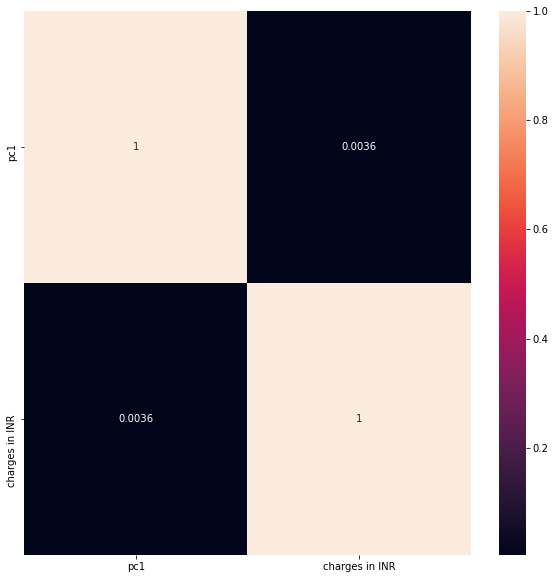

In [142]:
corr = pca_df.corr()

fig = plt.subplots(figsize =(10,10))
sns.heatmap(corr,annot=True)

In [40]:
def train_and_test_split(df, target, testsize = 0.3):
    x = df.drop(target, axis = 1)
    y = df[[target]]
    
    return(train_test_split(x, y, test_size = testsize, random_state = 0))

In [41]:
def build_model(model_name, estimator, data, target):
    x_train, x_test, y_train, y_test = train_and_test_split(data,target)
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score_test = r2_score(y_test, y_pred)
    y_pred_train = estimator.predict(x_train)
    r2score_train = r2_score(y_train, y_pred_train)
    temp = [model_name, rmse, r2score_test, r2score_train]
    
    return(temp)
    

In [159]:
build_model('Linear Regression', LinearRegression(), df, 'charges in INR')

['Linear Regression',
 6226.623612344027,
 0.7632453145971115,
 0.7424094819333269]

In [161]:
build_model('DT', DecisionTreeRegressor(), pca_df, 'charges in INR')

['DT', 17940.77859505652, -0.9655130304900661, 1.0]

In [162]:
def multiple_model(data, target):
    col_names = ['Model names', 'RMSE', 'R2Score_test', 'R2Score_train']
    
    result_df = pd.DataFrame(columns = col_names)
    
    result_df.loc[len(result_df)] = build_model('Linear Regression', LinearRegression(), data, target)
    
    result_df.loc[len(result_df)] = build_model('Lasso Regression', Lasso(), data, target)
    
    result_df.loc[len(result_df)] = build_model('Ridge Regression', Ridge(), data, target)
    
    result_df.loc[len(result_df)] = build_model('Decision Tree', DecisionTreeRegressor(), data, target)
    
    result_df.loc[len(result_df)] = build_model('KNN', KNeighborsRegressor(), data, target)
    
    result_df.loc[len(result_df)] = build_model('SVM', SVR(), data, target)
    
    result_df.loc[len(result_df)] = build_model('Random forest', RandomForestRegressor(), data, target)
    
    result_df.loc[len(result_df)] = build_model('Adaboost', AdaBoostRegressor(), data, target)
    
    result_df.loc[len(result_df)] = build_model('Gradboost', GradientBoostingRegressor(), data, target)
    
    #result_df.loc[len(result_df)] = build_model('XGboost', XGBRFRegressor(), data, target)
    
    return(result_df.sort_values('R2Score_test', ascending=True))

In [163]:
multiple_model(pca_df, 'charges in INR')

,Model names,RMSE,R2Score_test,R2Score_train
3,Decision Tree,17940.778595,-0.965513,1.000000
6,Random forest,15048.168516,-0.382804,0.786742
7,Adaboost,14523.820577,-0.288116,-0.344238
4,KNN,13673.566658,-0.141713,0.187557
5,SVM,13494.129617,-0.111944,-0.091164
8,Gradboost,13210.110887,-0.065630,0.260609
0,Linear Regression,12820.848342,-0.003753,0.000086
2,Ridge Regression,12820.848341,-0.003753,0.000086
1,Lasso Regression,12820.848240,-0.003753,0.000086


In [164]:
multiple_model(df, 'charges in INR')

,Model names,RMSE,R2Score_test,R2Score_train
5,SVM,13494.123098,-0.111943,-0.091227
4,KNN,12728.139520,0.010711,0.285160
3,Decision Tree,6876.994881,0.711204,1.000000
2,Ridge Regression,6229.949447,0.762992,0.742381
1,Lasso Regression,6226.759693,0.763235,0.742409
0,Linear Regression,6226.623612,0.763245,0.742409
7,Adaboost,5637.154345,0.805950,0.801742
6,Random forest,4876.858942,0.854764,0.976751
8,Gradboost,4838.663675,0.857030,0.917157


In [165]:
def cv_score(x, y, fold = 10):
    
    #fitting cross validation for all scores
    score_lr = cross_val_score(LinearRegression(), x, y, cv = fold)
    score_ls = cross_val_score(Lasso(), x, y, cv = fold)
    score_rd = cross_val_score(Ridge(), x, y, cv = fold)
    score_dt = cross_val_score(DecisionTreeRegressor(), x, y, cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(), x, y, cv = fold)
    score_svm = cross_val_score(SVR(), x, y, cv = fold)
    score_rf = cross_val_score(RandomForestRegressor(), x, y, cv = fold)
    score_adb = cross_val_score(AdaBoostRegressor(), x, y, cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(), x, y, cv = fold)
    #score_xgb = cross_val_score(XGBRFRegressor(), x, y, cv = fold)
    
    model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree', 'KNN', 'SVM', 'Random forest','Adaboost','Gradboost']
    #add xgbregressor
    
    scores = [score_lr, score_ls, score_rd, score_dt, score_knn, score_svm, score_rf, score_adb, score_gb]
     #add xgbregressor
        
    result = []
    
    for i in range (0,len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        estimator = model_names[i]
        temp = [estimator, score_std, score_mean]
        result.append(temp)
    
    results = pd.DataFrame(data = result, columns = ['model', 'score_std', 'score_mean'] )
    
    return(results.sort_values('score_mean', ascending=False))
    
    

In [190]:
cv_score(pca_df.drop('charges in INR', axis = 1),pca_df[['charges in INR']])

,model,score_std,score_mean
1,Lasso Regression,0.004731,-0.005010
2,Ridge Regression,0.004731,-0.005010
0,Linear Regression,0.004731,-0.005010
8,Gradboost,0.164677,-0.065210
5,SVM,0.031267,-0.106505
6,Random forest,0.234743,-0.199124
4,KNN,0.172483,-0.206914
7,Adaboost,0.202688,-0.278361
3,Decision Tree,0.291296,-0.407536


In [191]:
cv_score(df.drop('charges in INR', axis = 1),df[['charges in INR']])

,model,score_std,score_mean
8,Gradboost,0.085465,0.829758
6,Random forest,0.069957,0.818678
7,Adaboost,0.026953,0.817923
2,Ridge Regression,0.041813,0.744474
1,Lasso Regression,0.042165,0.744465
0,Linear Regression,0.042185,0.744460
3,Decision Tree,0.221369,0.618194
5,SVM,0.031200,-0.106494
4,KNN,0.101634,-0.116418


In [36]:
def hyper_tuning(x, y, fold = 10):
    
    
    para_ensemble= {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
    para_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
    para_rf = {'max_depth':[8,9,10,11,12],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
    para_dt = {'max_depth':[8,9,10,11,12]}
    para_lar= {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
  #  para_ensemble = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
    
  #  para_knn = {'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
    
  #  para_dt = {'max depth' : [8, 9, 10, 11, 12]}
    
    
    #tune_xgb = GridSearchCV(XGBRegressor(),para_ensemble, cv = fold)
    tune_gb = GridSearchCV(GradientBoostingRegressor(),para_ensemble, cv = fold)
    tune_ab = GridSearchCV(AdaBoostRegressor(),para_ensemble, cv = fold)
    tune_rf = GridSearchCV(RandomForestRegressor(),para_rf, cv = fold)
    tune_knn = GridSearchCV(KNeighborsRegressor(),para_knn, cv = fold)
    tune_dt = GridSearchCV(DecisionTreeRegressor(),para_dt, cv = fold)
    tune_l = GridSearchCV(Lasso(),para_lar, cv = fold)
    tune_r = GridSearchCV(Ridge(),para_lar, cv = fold)    
    
    #tune_xgb.fit(x,y)
    tune_gb.fit(x,y)    
    tune_ab.fit(x,y)
    tune_rf.fit(x,y)
    tune_knn.fit(x,y)
    tune_dt.fit(x,y)
    tune_l.fit(x,y)
    tune_r.fit(x,y)
    
    tune = [tune_gb, tune_ab, tune_rf, tune_knn, tune_dt, tune_l, tune_r]
    #xgb
    
    model_names = ['Gradboost','Adaboost', 'Random forest', 'KNN', 'Decision Tree', 'Lasso', 'Ridge']
    #xgb
    
    for i in range(0,len(tune)):
        print('Model', model_names[i])
        print('Best Parameters', tune[i].best_params_)
    
    
    
    

In [37]:
hyper_tuning(df.drop('charges in INR', axis = 1),df[['charges in INR']])

Model Gradboost
Best Parameters {'learning_rate': 0.2, 'n_estimators': 10}
Model Adaboost
Best Parameters {'learning_rate': 0.1, 'n_estimators': 10}
Model Random forest
Best Parameters {'max_depth': 8, 'n_estimators': 90}
Model KNN
Best Parameters {'n_neighbors': 20}
Model Decision Tree
Best Parameters {'max_depth': 8}
Model Lasso
Best Parameters {'alpha': 1}
Model Ridge
Best Parameters {'alpha': 0.9}


In [181]:
def cv_score_bestp(x, y, fold = 10):
    
    #fitting cross validation for all scores
#    score_lr = cross_val_score(LinearRegression(), x, y, cv = fold)
#    score_ls = cross_val_score(Lasso(), x, y, cv = fold)
#    score_rd = cross_val_score(Ridge(), x, y, cv = fold)
    score_dt = cross_val_score(DecisionTreeRegressor(max_depth = 8), x, y, cv = fold)
    score_rf = cross_val_score(RandomForestRegressor(n_estimators = 20, max_depth = 8), x, y, cv = fold)
    score_adb = cross_val_score(AdaBoostRegressor(learning_rate = 0.1, n_estimators=10), x, y, cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(learning_rate=0.2, n_estimators=10), x, y, cv = fold)
    #score_xgb = cross_val_score(XGBRFRegressor(), x, y, cv = fold)
    
#    model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree', 'KNN', 'SVM', 'Random forest','Adaboost','Gradboost']
    #add xgbregressor
    model_names = ['Decision Tree', 'Random forest','Adaboost','Gradboost']
#    scores = [score_lr, score_ls, score_rd, score_dt, score_knn, score_svm, score_rf, score_adb, score_gb]
     #add xgbregressor
    scores = [score_dt, score_rf, score_adb, score_gb]
   
    result = []
    
    for i in range (0,len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        estimator = model_names[i]
        temp = [estimator, score_std, score_mean]
        result.append(temp)
    
    results = pd.DataFrame(data = result, columns = ['model', 'score_std', 'score_mean'] )
    
    return(results.sort_values('score_mean', ascending=False))
    
    

In [179]:
cv_score_bestp(pca_df.drop('charges in INR', axis = 1),pca_df[['charges in INR']]) 


,model,score_std,score_mean
3,Gradboost,0.043762,-0.021381
2,Adaboost,0.024103,-0.027853
0,Decision Tree,0.239477,-0.098146
1,Random forest,0.215548,-0.100834


 for pca
    score_dt = cross_val_score(DecisionTreeRegressor(max_depth = 8), x, y, cv = fold)
    score_rf = cross_val_score(RandomForestRegressor(n_estimators = 10, max_depth = 8), x, y, cv = fold)
    score_adb = cross_val_score(AdaBoostRegressor(learning_rate = 0.2, n_estimators=10), x, y, cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(learning_rate=0.1, n_estimators=10), x, y, cv = fold)

In [183]:
cv_score_bestp(df.drop('charges in INR', axis = 1),df[['charges in INR']]) 

,model,score_std,score_mean
2,Adaboost,0.044034,0.844933
3,Gradboost,0.038681,0.844005
1,Random forest,0.071367,0.817349
0,Decision Tree,0.218377,0.689188


In [188]:
df

,index,age,sex,bmi,charges in INR,children,smoker,region
0,0,19,0,27.900,16884.92400,0,1,3
1,1,18,1,33.770,1725.55230,1,0,2
2,2,28,1,33.000,4449.46200,3,0,2
3,3,33,1,22.705,21984.47061,0,0,1
4,4,32,1,28.880,3866.85520,0,0,1
...,...,...,...,...,...,...,...,...
1332,1333,50,1,30.970,10600.54830,3,0,1
1333,1334,18,0,31.920,2205.98080,0,0,0
1334,1335,18,0,36.850,1629.83350,0,0,2
1335,1336,21,0,25.800,2007.94500,0,0,3


In [42]:
def multiple_model_bestp(data, target):
    col_names = ['Model names', 'RMSE', 'R2Score_test', 'R2Score_train']
    
    result_df = pd.DataFrame(columns = col_names)
    
    result_df.loc[len(result_df)] = build_model('Linear Regression', LinearRegression(), data, target)
    
    result_df.loc[len(result_df)] = build_model('Lasso Regression', Lasso(alpha = 1), data, target)
    
    result_df.loc[len(result_df)] = build_model('Ridge Regression', Ridge(alpha = 0.9), data, target)
    
    result_df.loc[len(result_df)] = build_model('Decision Tree', DecisionTreeRegressor(max_depth = 8), data, target)
    
    result_df.loc[len(result_df)] = build_model('KNN', KNeighborsRegressor(), data, target)
    
    result_df.loc[len(result_df)] = build_model('SVM', SVR(), data, target)
    
    result_df.loc[len(result_df)] = build_model('Random forest', RandomForestRegressor(n_estimators = 20, max_depth = 8), data, target)
    
    result_df.loc[len(result_df)] = build_model('Adaboost', AdaBoostRegressor(learning_rate = 0.1, n_estimators=10), data, target)
    
    result_df.loc[len(result_df)] = build_model('Gradboost', GradientBoostingRegressor(learning_rate=0.2, n_estimators=10), data, target)
    
    #result_df.loc[len(result_df)] = build_model('XGboost', XGBRFRegressor(), data, target)
    
    return(result_df.sort_values('R2Score_test', ascending=True))

In [43]:
multiple_model_bestp(df, 'charges in INR')

,Model names,RMSE,R2Score_test,R2Score_train
5,SVM,13494.123098,-0.111943,-0.091227
4,KNN,12728.139520,0.010711,0.285160
2,Ridge Regression,6229.589121,0.763020,0.742386
1,Lasso Regression,6226.759693,0.763235,0.742409
0,Linear Regression,6226.623612,0.763245,0.742409
3,Decision Tree,6050.933959,0.776417,0.934582
8,Gradboost,5022.293680,0.845973,0.860067
7,Adaboost,4959.402597,0.849806,0.858171
6,Random forest,4908.489727,0.852874,0.947619
